In [1]:
import os
import pandas as pd
import numpy as np
from scipy.stats import norm, probplot, skew
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [2]:
train_path = os.path.join('datasets', 'housing_prices', 'train.csv')
train_df = pd.read_csv(train_path)

test_path = os.path.join('datasets', 'housing_prices', 'test.csv')
test_df = pd.read_csv(test_path)

print(f'Train shape {train_df.shape}')
print(f'Test shape {test_df.shape}')
train_df.head()

Train shape (1460, 81)
Test shape (1459, 80)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


C:\Users\Bartek\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='SalePrice'>

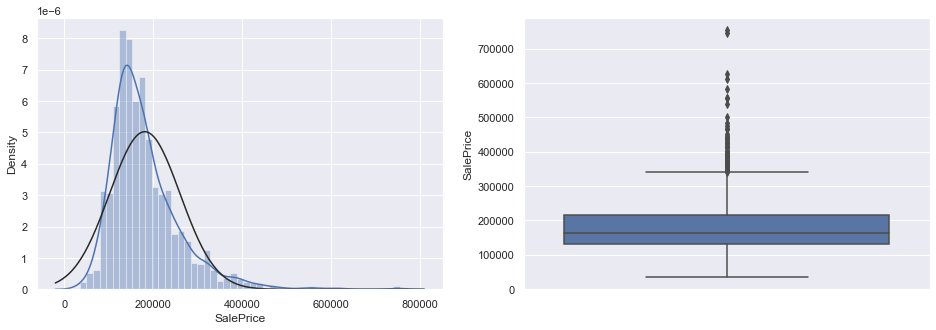

In [3]:
fig, axes = plt.subplots(1, 2, figsize=(16, 5))
sns.distplot(train_df['SalePrice'], ax=axes[0], fit=norm)
sns.boxplot(y=train_df['SalePrice'], ax=axes[1])

### Removing outliers and normalizing labels

C:\Users\Bartek\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


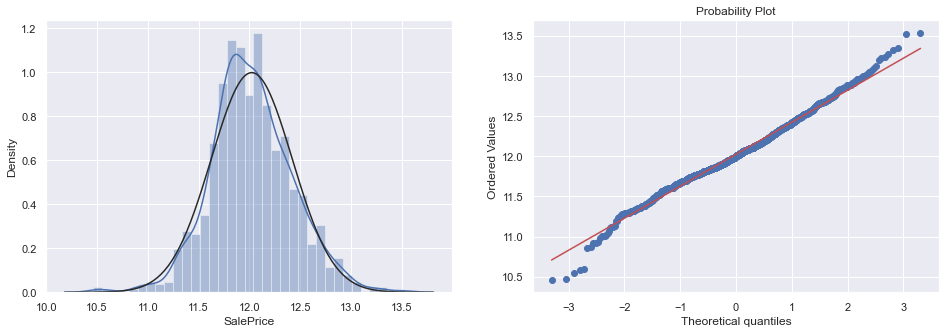

In [4]:
train_df = train_df.loc[train_df['SalePrice'] <= 500_000]
train_df['SalePrice'] = np.log1p(train_df['SalePrice'])
_, axes = plt.subplots(1, 2, figsize=(16, 5))
sns.distplot(train_df['SalePrice'], fit=norm, ax=axes[0])
probplot(train_df['SalePrice'], plot=axes[1]);

### Filling Null values

In [5]:
all_train = train_df.append(test_df)
nulls = (all_train.isna().sum() / all_train.shape[0]) * 100
nulls[nulls > 0].sort_values(ascending=False)

PoolQC          99.657417
MiscFeature     96.402878
Alley           93.216855
Fence           80.438506
SalePrice       49.982871
FireplaceQu     48.646797
LotFrontage     16.649538
GarageYrBlt      5.447071
GarageFinish     5.447071
GarageQual       5.447071
GarageCond       5.447071
GarageType       5.378554
BsmtCond         2.809181
BsmtExposure     2.809181
BsmtQual         2.774923
BsmtFinType2     2.740665
BsmtFinType1     2.706406
MasVnrType       0.822199
MasVnrArea       0.787941
MSZoning         0.137033
BsmtFullBath     0.068517
BsmtHalfBath     0.068517
Functional       0.068517
Utilities        0.068517
BsmtFinSF2       0.034258
BsmtUnfSF        0.034258
BsmtFinSF1       0.034258
TotalBsmtSF      0.034258
SaleType         0.034258
KitchenQual      0.034258
Exterior2nd      0.034258
Exterior1st      0.034258
GarageCars       0.034258
GarageArea       0.034258
Electrical       0.034258
dtype: float64

In [6]:
all_train['PoolQC'].fillna('None', inplace=True)
all_train['MiscFeature'].fillna('None', inplace=True)
all_train['Alley'].fillna('None', inplace=True)
all_train['Fence'].fillna('None', inplace=True)
all_train['FireplaceQu'].fillna('None', inplace=True)

lot_mean = train_df.groupby('Neighborhood')['LotFrontage'].mean()
all_train = pd.merge(all_train, lot_mean, on='Neighborhood', suffixes=('', '_mean'))
all_train['LotFrontage'].fillna(all_train['LotFrontage_mean'], inplace=True)
all_train.drop(columns='LotFrontage_mean', inplace=True)

all_train['GarageYrBlt'].fillna(0, inplace=True)
all_train['GarageFinish'].fillna('None', inplace=True)
all_train['GarageQual'].fillna('None', inplace=True)
all_train['GarageCond'].fillna('None', inplace=True)
all_train['GarageType'].fillna('None', inplace=True)

all_train['BsmtCond'].fillna('None', inplace=True)
all_train['BsmtExposure'].fillna('None', inplace=True)
all_train['BsmtQual'].fillna('None', inplace=True)
all_train['BsmtFinType2'].fillna('None', inplace=True)
all_train['BsmtFinType1'].fillna('None', inplace=True)

all_train['MasVnrType'].fillna('None', inplace=True)
all_train['MasVnrArea'].fillna(0, inplace=True)

all_train['MSZoning'].fillna(train_df['MSZoning'].mode()[0], inplace=True)
all_train['BsmtFullBath'].fillna(0, inplace=True)
all_train['BsmtHalfBath'].fillna(0, inplace=True)

all_train['Functional'].fillna('Typ', inplace=True)
all_train['Utilities'].fillna('AllPub', inplace=True)
all_train['BsmtFinSF2'].fillna(0, inplace=True)
all_train['BsmtUnfSF'].fillna(0, inplace=True)
all_train['BsmtFinSF1'].fillna(0, inplace=True)
all_train['TotalBsmtSF'].fillna(0, inplace=True)
all_train['SaleType'].fillna('Oth', inplace=True)

all_train['KitchenQual'].fillna('TA', inplace=True)
all_train['Exterior2nd'].fillna('Other', inplace=True)
all_train['Exterior1st'].fillna('Other', inplace=True)
all_train['GarageCars'].fillna(0, inplace=True)
all_train['GarageArea'].fillna(0, inplace=True)
all_train['Electrical'].fillna('Mix', inplace=True)

all_train.isna().any().sum()

1

### EDA

<AxesSubplot:>

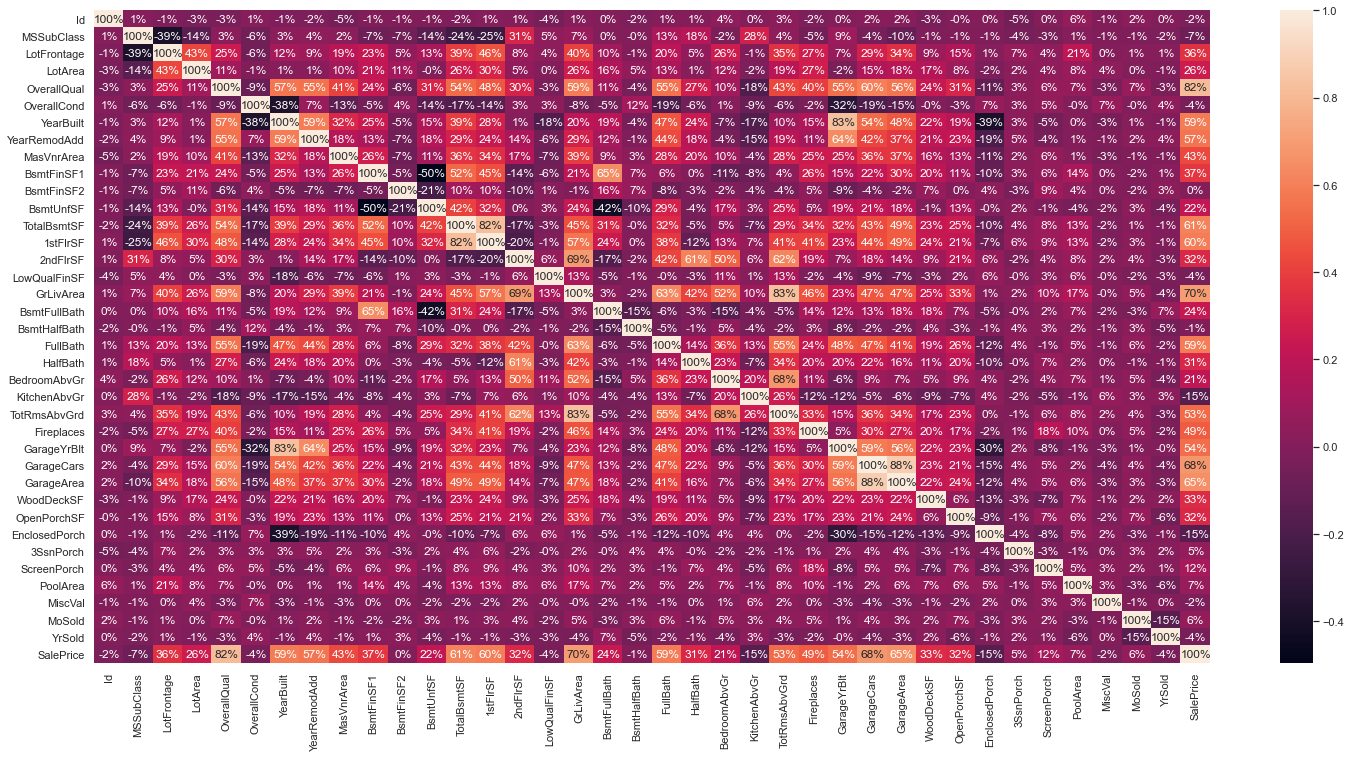

In [7]:
plt.figure(figsize=(25, 12))
corr_mat = train_df.corr()
sns.heatmap(corr_mat, annot=True, fmt='.0%')

<AxesSubplot:xlabel='PavedDrive', ylabel='SalePrice'>

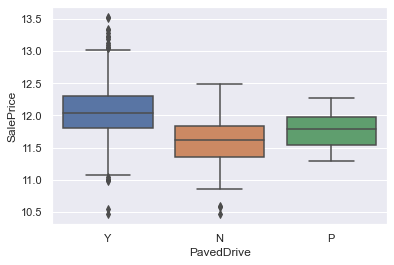

In [8]:
'Neiggborhood'
'HouseStyle'
'CentralAir'
'TotRmsAbvGrd'

'YearBuilt'
'GarageYrBlt'
'BsmtFinSF1'
'TotalBsmtSF'
'1stFlrSF'
'2ndFlrSF'
'GrLivArea'
'GarageArea'

'TotRmsAbvGrd' + 'FullBath'

sns.boxplot(y='SalePrice', x='PavedDrive', data=train_df)

Quality is really important

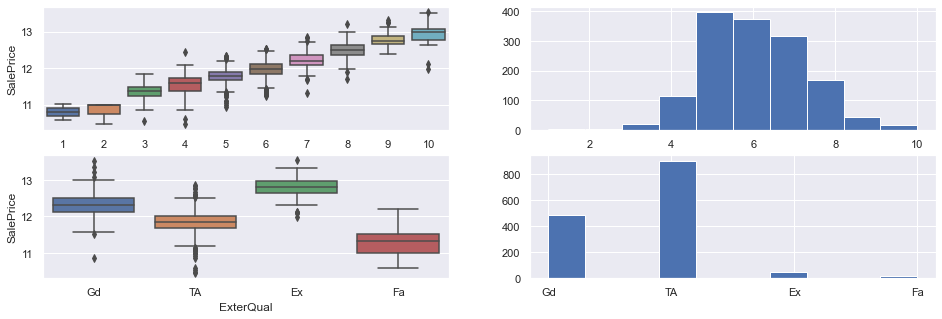

In [9]:
_, axes = plt.subplots(2, 2, figsize=(16, 5))
cols = ['OverallQual', 'ExterQual']
for i, col in enumerate(cols):
    ax1, ax2 = axes[i]
    sns.boxplot(y='SalePrice', x=col, data=train_df, ax=ax1)
    train_df[col].hist(ax=ax2)

<AxesSubplot:xlabel='Neighborhood', ylabel='SalePrice'>

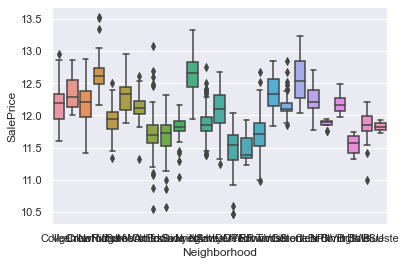

In [10]:
sns.boxplot(x='Neighborhood', y='SalePrice', data=train_df)

### Machine Learning

First model - just to check

In [11]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

### Changes in features

In [12]:
train_ind = all_train[all_train['Id'].isin(train_df['Id'])].index
test_ind = all_train[all_train['Id'].isin(test_df['Id'])].index

In [13]:
all_train['MSSubClass'] = all_train['MSSubClass'].astype('object')
all_train['OverallQual'] = all_train['OverallQual'].astype('object')
all_train['OverallCond'] = all_train['OverallCond'].astype('object')

all_train['TotalRooms'] = all_train['TotRmsAbvGrd'] + all_train['FullBath']
all_train['TotalSF'] = all_train['TotalBsmtSF'] + all_train['1stFlrSF'] + all_train['2ndFlrSF']

In [14]:
skew_df = all_train.iloc[train_ind].select_dtypes(exclude='object').apply(lambda x: skew(x))
high_skew_cols = (skew_df[skew_df > 1]).index
all_train[high_skew_cols] = np.log1p(all_train[high_skew_cols])

In [15]:
train_ind = all_train[all_train['Id'].isin(train_df['Id'])].index
test_ind = all_train[all_train['Id'].isin(test_df['Id'])].index
all_train.drop(columns=['Utilities', 'Id'], inplace=True)

all_train = pd.get_dummies(all_train)
train = all_train.iloc[train_ind]
test = all_train.iloc[test_ind]

In [16]:
final_train, valid_df = train_test_split(train, random_state=42, test_size=0.2)
X_train = final_train.drop(columns='SalePrice')
Y_train = final_train['SalePrice']

X_valid = valid_df.drop(columns='SalePrice')
Y_valid = valid_df['SalePrice']

In [17]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train, Y_train)
Y_pred = rf_model.predict(X_valid)
np.sqrt(mean_squared_error(Y_valid, Y_pred))

0.143600167616274

### Lasso Regression

In [18]:
Y_final = rf_model.predict(test.drop(columns='SalePrice'))

In [19]:
submission = pd.DataFrame({'Id': test_df['Id'], 'SalePrice': np.expm1(Y_final)})

In [20]:
submission.to_csv('results.csv', index=False)

In [10]:
sub = pd.read_csv('submission.csv')

In [22]:
temp = pd.merge(sub, submission, on='Id')

In [23]:
temp['Diff'] = np.abs(temp['SalePrice_x'] - temp['SalePrice_y'])

In [24]:
np.sqrt((mean_squared_error(np.log1p(temp['SalePrice_x']), np.log1p(temp['SalePrice_y']))))

0.5582960244635485

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib

import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.stats.stats import pearsonr


%config InlineBackend.figure_format = 'retina' #set 'png' here when working on notebook
%matplotlib inline

In [13]:
import os

sub = pd.read_csv('submission.csv')
train_path = os.path.join('datasets', 'housing_prices', 'train.csv')
train_df = pd.read_csv(train_path)

test_path = os.path.join('datasets', 'housing_prices', 'test.csv')
test_df = pd.read_csv(test_path)

In [14]:
train_df = train_df.loc[train_df['SalePrice'] <= 500_000]
train_df['SalePrice'] = np.log1p(train_df['SalePrice'])

In [15]:
all_train = train_df.append(test_df)
nulls = (all_train.isna().sum() / all_train.shape[0]) * 100
nulls[nulls > 0].sort_values(ascending=False)

# all_train.drop(columns=['Utilities', 'Id', 'SalePrice'], inplace=True)

PoolQC          99.690722
MiscFeature     96.391753
Alley           93.195876
Fence           80.412371
SalePrice       50.137457
FireplaceQu     48.797251
LotFrontage     16.701031
GarageYrBlt      5.463918
GarageFinish     5.463918
GarageQual       5.463918
GarageCond       5.463918
GarageType       5.395189
BsmtCond         2.817869
BsmtExposure     2.817869
BsmtQual         2.783505
BsmtFinType2     2.749141
BsmtFinType1     2.714777
MasVnrType       0.824742
MasVnrArea       0.790378
MSZoning         0.137457
BsmtFullBath     0.068729
BsmtHalfBath     0.068729
Functional       0.068729
Utilities        0.068729
BsmtFinSF2       0.034364
BsmtUnfSF        0.034364
BsmtFinSF1       0.034364
TotalBsmtSF      0.034364
SaleType         0.034364
KitchenQual      0.034364
Exterior2nd      0.034364
Exterior1st      0.034364
GarageCars       0.034364
GarageArea       0.034364
Electrical       0.034364
dtype: float64

In [16]:
#log transform skewed numeric features:

train_ind = all_train[all_train['Id'].isin(train_df['Id'])].index
test_ind = all_train[all_train['Id'].isin(test_df['Id'])].index

all_train.drop(columns=['Utilities', 'Id', 'SalePrice'], inplace=True)

skew_df = train_df.select_dtypes(exclude='object').apply(lambda x: skew(x))
high_skew_cols = (skew_df[skew_df > 1]).index
all_train[high_skew_cols] = np.log1p(all_train[high_skew_cols])

all_train = pd.get_dummies(all_train)

#filling NA's with the mean of the column:
all_train = all_train.fillna(all_train.mean())

#creating matrices for sklearn:
X_train = all_train.iloc[train_ind]
X_test = all_train.iloc[test_ind]
y = train_df.SalePrice

from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score

def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)



model_ridge = Ridge()



alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() 
            for alpha in alphas]

Text(0, 0.5, 'rmse')

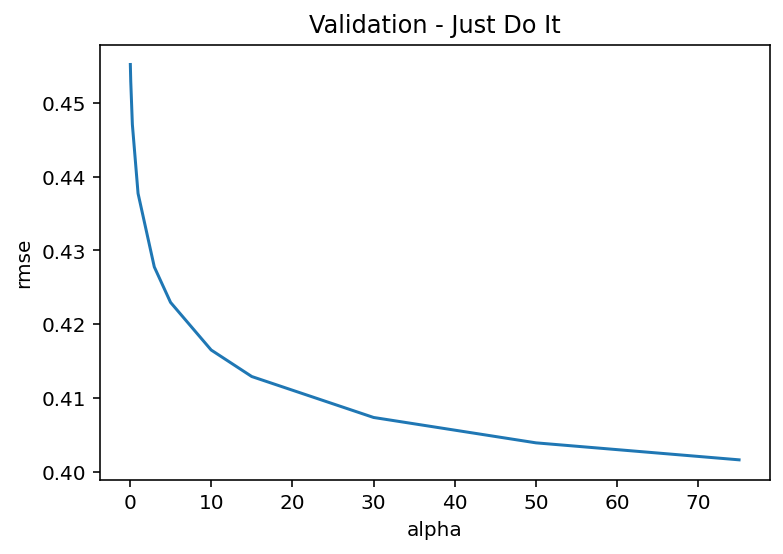

In [17]:
cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = "Validation - Just Do It")
plt.xlabel("alpha")
plt.ylabel("rmse")

In [45]:
model = Ridge()
model.fit(X_train, y)
Y_pred = model.predict(X_test)

In [46]:
Y_pred

array([11.70829982, 11.95440886, 12.12813555, ..., 12.01808676,
       11.6954095 , 12.29871113])

In [47]:
sub['Ridge'] = Y_pred

In [48]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(np.log1p(sub['SalePrice']), sub['Ridge']))

0.05749144236825177

In [31]:
sub['Ridge'] = np.expm1(sub['Ridge'])

In [22]:
sub['diff'] = sub['Ridge'] - sub['SalePrice']
sub

,Id,SalePrice,Ridge,diff
0,1461,119614.276124,120420.655489,806.379365
1,1462,161078.679551,153867.564298,-7211.115254
2,1463,187235.248608,185515.001785,-1720.246823
3,1464,196967.059969,199064.684452,2097.624483
4,1465,192551.623581,201164.850838,8613.227257
...,...,...,...,...
1454,2915,83987.636396,86057.966529,2070.330133
1455,2916,81669.774919,80936.238911,-733.536008
1456,2917,167255.032576,174498.494208,7243.461631
1457,2918,116383.531625,119365.823221,2982.291596
